### 특성 맵 확인하기

In [1]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image

import matplotlib.pyplot as plt
import numpy as np


2024-11-03 15:05:46.069410: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1730613946.098328   22506 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1730613946.108882   22506 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-03 15:05:46.163801: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
from PIL import Image, ImageOps
import numpy as np

def load_and_pad_image(image_path, target_size=(224, 224)):
    # 이미지 로드
    original_img = Image.open(image_path)
    with Image.open(image_path) as im:
        im.thumbnail(target_size)

    # 색상 채널을 고려하여 패딩
    delta_w = target_size[0] - im.size[0]
    delta_h = target_size[1] - im.size[1]
    padding = (delta_w // 2, delta_h // 2, delta_w - (delta_w // 2), delta_h - (delta_h // 2))
    
    padded_img = ImageOps.expand(im, padding, fill=(255, 255, 255))

    # numpy 배열로 변환
    img_vec = np.array(padded_img)
    img_vec = np.reshape(img_vec, (1, *img_vec.shape))/255

    return img_vec

In [3]:
# 사전 학습된 모델 로드
model = VGG16(weights='imagenet')

I0000 00:00:1730613950.203260   22506 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9711 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:07:00.0, compute capability: 8.6


In [4]:
# 중간 레이어의 출력을 모델에 포함
layer_outputs = [layer.output for layer in model.layers]
feature_map_model = Model(inputs=model.input, outputs=layer_outputs)

In [5]:
img_vec = load_and_pad_image("../../data/img_fish.png")

In [ ]:
#  feature maps 계산
feature_maps = feature_map_model.predict(img_vec)

# 첫 번째 레이어의 특성 맵 시각화
first_layer_feature_map = feature_maps[0]
num_channels = first_layer_feature_map.shape[-1]  #  channels 수 가져오기

# Create a subplot grid that is approximately square
num_cols = int(np.ceil(np.sqrt(num_channels)))
num_rows = int(np.ceil(num_channels / num_cols))

plt.figure(figsize=(num_cols * 2, num_rows * 2))  # Adjust the figure size appropriately

for i in range(num_channels):
    plt.subplot(num_rows, num_cols, i + 1)  # 시각화
    plt.imshow(first_layer_feature_map[0, :, :, i], cmap='viridis')
    plt.axis('off')

plt.tight_layout()
plt.show()


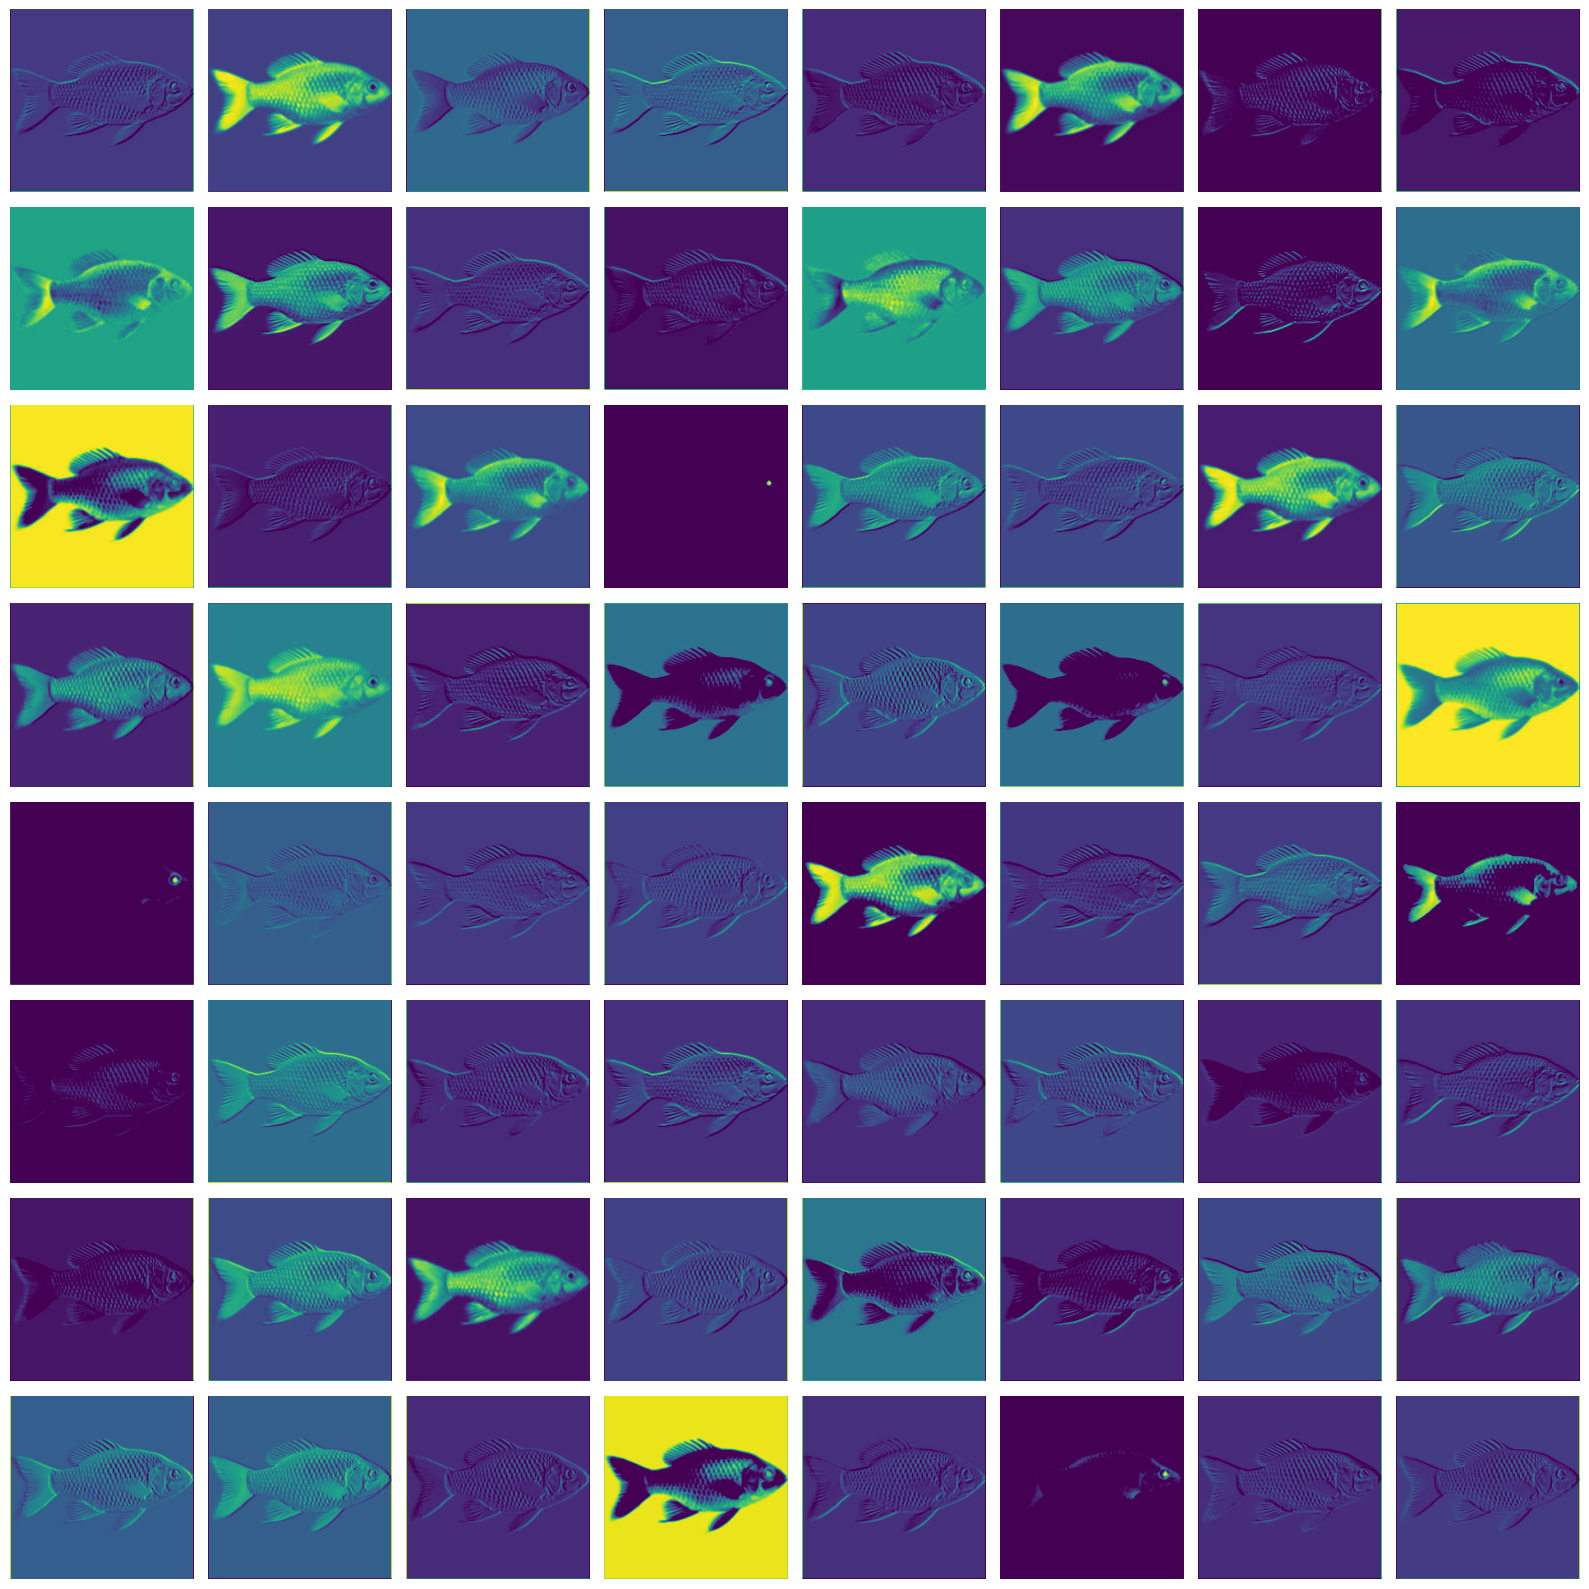

In [ ]:
# 두 번째 레이어의 특성 맵 시각화
first_layer_feature_map = feature_maps[1]
num_channels = first_layer_feature_map.shape[-1]  #  channels 수 가져오기

# Create a subplot grid that is approximately square
num_cols = int(np.ceil(np.sqrt(num_channels)))
num_rows = int(np.ceil(num_channels / num_cols))

plt.figure(figsize=(num_cols * 2, num_rows * 2))  # Adjust the figure size appropriately

for i in range(num_channels):
    plt.subplot(num_rows, num_cols, i + 1)  # 시각화
    plt.imshow(first_layer_feature_map[0, :, :, i], cmap='viridis')
    plt.axis('off')

plt.tight_layout()
plt.show()